# Les 01

## Inleiding

Dit is de werkcollege-oefening bij Les 01 van het vak *Advanced Datamining* (BFVH4DMN2). Bestudeer eerst de syllabus behorende bij deze les. Op BlackBoard kun je naast dit iPython/Jupyter notebook een tweetal Python-bestanden vinden. Sla deze op in dezelfde folder als dit notebook. Het verdient aanbeveling om voor elke les een aparte folder aan te maken.

- **model.py** bevat een opzet voor een module met object-georiënteerde implementaties van neurale netwerk algoritmen. Het doel van deze oefening is om deze code aan te vullen en uit te werken tot een correct werkend model. Open dit bestand in een code-editor naar keuze. Vergeet niet om tijdens het uitwerken van deze oefening je aanpassingen in de editor telkens op te slaan voordat je de code in dit notebook uitvoert!

- **data.py** bevat een aantal functies die helpen bij het genereren en het visualiseren van de gebruikte datasets. Deze functies hoeven maar één keer ingelezen te worden en hoef je niet te wijzigen om deze opdracht correct uit te kunnen voeren. Laten we dus beginnen om deze functies te importeren: plaats de cursor in de cel hieronder en druk op Shift+Enter.

In [1]:
%matplotlib inline
import sys, model, data

Laten we eerst eens beter kijken naar de data. De functie `generate()` van de module `data` produceert een verzameling willekeurige instances met continue attributen. Er zijn parameters om het aantal instances te bepalen, het aantal attributen, en om desgewenst de bias en gewichten aan te geven van het model dat gebruikt wordt om de data te genereren. Al deze parameters hebben geschikte default waarden. Een verplichte boolean parameter geeft aan of de dataset nominale uitkomsten dient te hebben t.b.v. classificatie (`nominal=True`) of continue uitkomsten t.b.v. regressie (`nominal=False`). De functie retourneert een lijst met vectoren die de attributen van de instances bevat en een lijst met klasselabels danwel getalwaarden die de bijbehorende uitkomsten bevat. De nominale data zijn lineair separabel; de continue data volgen een lineaire relatie. De algoritmen zouden hierdoor in principe in staat behoren te zijn deze data exact te modelleren.

In [2]:
help(data.generate_data)

Help on function generate_data in module data:

generate_data(num=64, dim=2, bias=None, weights=None, binary=True)
    Generate a suitable dataset with attributes and outcomes.
    
    Keyword arguments:
    num     -- the number of instances (default 64)
    dim     -- the dimensionality of the attributes (default 2)
    bias    -- the bias of the model equation (default random)
    weights -- the weights of the model equation (default random)
    binary  -- generate binary classes or continuous values (default True)
    
    Return values:
    xs      -- the num x dim values of the attributes
    ys      -- the num values of the labels



## Het perceptron

Laten we beginnen met een dataset met twee attributen $x_1$ en $x_2$ en met nominale klasselabels $y$ waarop we classificatie kunnen toepassen d.m.v. het perceptron. De functie `data.plot` geeft de instances van beide klassen weer middels een kleurcode (rood voor de klasse $y=-1$ en blauw voor de klasse $y=+1$). Voeg zonodig instructies toe om te verkennen hoe de data in de variabelen `xs` en `ys` is georganiseerd.

[2, 2]


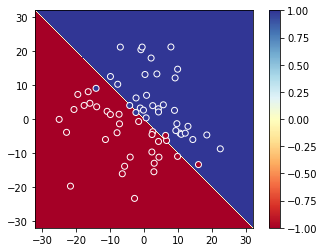

In [3]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_perceptron = Perceptron()

xs, ys = data.generate_data()
data.plot_data(xs, ys, my_perceptron)

We beginnen met het implementeren van de instantiatie-methode `__init__()`. Deze heeft een optionele parameter `dim` die aangeeft hoeveel attributen de te classificeren instances zullen hebben. Het perceptron model heeft twee parameters:

- een *bias* $b$;

- een vector met *gewichten* $\boldsymbol{w}$.

Denk na wat voor typen variabelen je hiervoor wil gebruiken en initialiseer deze met geschikte beginwaarden. Het resultaat is iets als:

```
def __init__(self, dim=2):
    self.bias = ...
    self.weights = ...
```

De weergave-methode `__str__()` is reeds geïmplementeerd; je hoeft deze niet te veranderen, maar voel je vrij om de informatie over een object uit te breiden of anders weer te geven.

Als het goed is kun je nu zonder foutmeldingen een nieuw Perceptron-object instantiëren en weergeven. Controleer dat de bias en gewichten juist zijn geinitialiseerd.

*Nota bene: de eerste twee regels van de code hieronder dienen om de meest recente versie van je module met het model opnieuw in te lezen nadat je deze opgeslagen hebt vanuit je editor.*

In [4]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_perceptron = Perceptron()
print(my_perceptron)

[2, 2]


[2, 2]


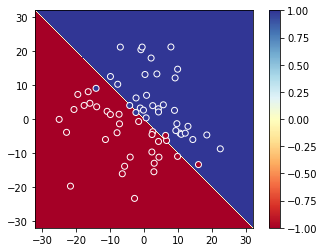

In [5]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_perceptron = Perceptron()
data.plot_data(xs, ys, model=my_perceptron)

Vervolgens gaan we het perceptron trainen op grond van één instance met gegeven attributen en klasselabel. Gebruik hiervoor de update-regel:
\begin{equation*}
\left\{ \begin{array}{c}
b\leftarrow b+\left(y-\hat{y}\right)\\
w_{i}\leftarrow w_{i}+\left(y-\hat{y}\right)x_{i}
\end{array}\right.
\end{equation*}
De methode `train(self, x, y)` heeft parameters die de attributen en het klasselabel van een instance ontvangt. Deze functie hoeft niets te retourneren.

Als je deze code correct hebt geïmplementeerd zou je hieronder een gekleurde achtergrond moeten zien die weergeeft hoe het perceptron de verschillende waarden van de attributen zou classificeren nadat het één maal getraind is met de eerste instance uit de dataset. Hoogstwaarschijnlijk zal er nog geen correcte grenslijn gevonden worden, maar het perceptron doet wel al voorspellingen en je zou moeten kunnen zien dat de bias en gewichten zijn bijgewerkt.

[2, 2]
[-0.889280252065838, 20.419381534046337]
1
-0.889280252065838
2
-0.889280252065838
2
20.419381534046337
2
20.419381534046337
2
[[-1], [-1], [1], [1]]


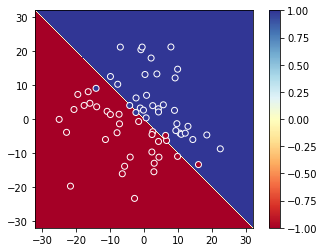

In [6]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_perceptron = Perceptron()
my_perceptron.train(xs[0], ys[0])
data.plot_data(xs, ys, model=my_perceptron)
print(my_perceptron)

De laatste methode die geïmplementeerd dient te worden heet `fit(self, xs, ys, epochs=0)`. Deze dient de hele dataset te gebruiken om het perceptron te trainen. Er kan een extra argument worden meegegeven dat het aantal te draaien epochs definieert.

Met de onderstaande code kun je het perceptron één epoch laten trainen. Het is niet met zekerheid te zeggen of het algoritme dan al tot een correcte oplossing is geconvergeerd. Sterker nog, de oplossing zou er zelfs slechter kunnen uitzien dan die na het trainen met één instance hierboven. Voer de code een aantal keren uit met telkens nieuwe willekeurige data om hier een beter idee van te krijgen. Pas het aantal epochs aan om te zien hoeveel er nodig zijn om een goede oplossing te verkrijgen.

In [7]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_perceptron = Perceptron()
my_perceptron.fit(xs, ys, epochs=1)
data.plot(xs, ys, model=my_perceptron)

[2, 2]


TypeError: fit() got an unexpected keyword argument 'epochs'

Rosenblatt heeft bewezen dat het perceptron algoritme gegarandeerd in een eindig aantal stappen convergeert naar een oplossing die alle instances juist classificeert als de data lineair separabel zijn. Dat is hier het geval. Pas je code aan zodat het perceptron automatisch stopt met het draaien van verdere epochs als er in de vorige epoch geen veranderingen in het model meer zijn aangebracht. Bedenk zelf hoe je deze logica het beste kan implementeren.

Als de gebruiker om nul epochs verzoekt, of geen waarde meegeeft waardoor de default waarde `epochs=0` geldt, laat dan het algoritme zoveel epochs draaien als maar nodig zijn om te convergeren.

Als je dit juist implementeert zou de onderstaande code voor élke dataset een lijn moeten vinden die de beide klassen perfect van elkaar weet te scheiden.

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_perceptron = Perceptron()
my_perceptron.fit(xs, ys)
data.plot(xs, ys, model=my_perceptron)
print(my_perceptron)

**Gefeliciteerd!** Je hebt zelf een algoritme geïmplementeerd dat een lineair separabele verzameling trainingsdata perfect kan leren onderscheiden.

Experimenteer zelf verder hoe het algoritme zich gedraagt. Bijvoorbeeld:

- Als je de `data.generate` functie een vooraf bekende bias en gewichten meegeeft om data mee te genereren, convergeert het perceptron dan ook naar deze waarden, of lijken ze erop?

- Wat gebeurt er wanneer alle instances van dezelfde klasse zijn (genereer hiertoe bijvoorbeeld een dataset met maar één instance)?

- Hoe lang duurt het om te convergeren als het aantal instances toeneemt (bijvoorbeeld $n = 1000$)?

## Lineaire Regressie

Vervolgens doen we hetzelfde met instances die een getalwaarde als te voorspellen uitkomst hebben. Eerst maar weer eens een kijkje nemen naar de data. Deze hebben nu continue uitkomsten. De instances zijn daardoor gekleurd langs het hele bereik van de kleurschaal. De ligging van de verschillende kleuren vormt wel een zichtbare geleidelijke overgang.

In [ ]:
xs, ys = data.generate(nominal=False)
data.plot(xs, ys)

Begin weer met het schrijven van de instantiatie- en predictie-methoden. Het perceptron van zojuist zou hier een goed uitgangspunt voor moeten vormen. Het model voor lineaire regressie luidt:
\begin{equation*}
\hat{y}=b+\sum_{i}w_{i}\cdot x_{i}
\end{equation*}
De methode `predict(self, x)` dient in dit geval een getalwaarde te retourneren i.p.v. een klasselabel.

Een ongetraind model zou wederom dezelfde grafiek moeten opleveren als hierboven. Controleer dat je geen foutmeldingen krijgt.

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_linear_regression = LinearRegression()
data.plot(xs, ys, model=my_linear_regression)
print(my_linear_regression)

Vervolgens gaan we het lineaire regressiemodel trainen, eerst weer op grond van één instance met de update-regel:
\begin{equation*}
\left\{ \begin{array}{c}
b\leftarrow b+\alpha\left(y-\hat{y}\right)\\
w_{i}\leftarrow w_{i}+\alpha\left(y-\hat{y}\right)x_{i}
\end{array}\right.
\end{equation*}
De methode `train(self, x, y, alpha=0)` heeft een extra parameter, de learning rate. Deze heeft nu een default waarde $\alpha=0$, maar dit is niet zo zinvol. Vervang deze door een redelijkere waarde.

Na het trainen met één instance wordt het model nog maar weinig aangepast, maar als we een nogal grote learning rate $\alpha=0.1$ kiezen zou er toch een gradiënt in de achtergrond zichtbaar kunnen worden. De diagonale stippellijn geeft aan waar de voorspelling $\hat{y}=0$; deze scheidt dus de instances met een voorspelde positieve uitkomst van die met een voorspelde negatieve uitkomst.

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_linear_regression = LinearRegression()
my_linear_regression.train(xs[0], ys[0], alpha=0.1)
data.plot(xs, ys, model=my_linear_regression)

Voeg nu tenslotte weer de methode `fit(self, xs, ys, alpha=0, epochs=100)` toe die training toepast op een gegeven aantal hele epochs. Pas de default waarde voor de learning rate weer aan, in overeenkomst met de trainings-functie. In tegenstelling tot bij het perceptron kan het aantal epochs nu niet default op nul worden gesteld; immers, het lineare regressie model convergeert meestal niet naar een exacte uitkomst. Wel wordt er bij een juiste keuze van $\alpha$ een steeds betere benadering gevonden.

Draai de code hieronder. Slaagt je model erin om te convergeren naar een uitkomst die de echte getalwaarden van de instances ogenschijnlijk goed voorspelt?

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_linear_regression = LinearRegression()
my_linear_regression.fit(xs, ys)
data.plot(xs, ys, model=my_linear_regression)
print(my_linear_regression)

**Nogmaals gefeliciteerd!** Je hebt nu ook een algoritme geïmplementeerd dat lineaire regressie kan uitvoeren.

Experimenteer weer hoe het algoritme zich gedraagt. Bijvoorbeeld:

- Als je nu de `data.generate` functie een vooraf bekende bias en gewichten meegeeft om data mee te genereren, convergeert het lineaire regressie model dan naar deze waarden, of lijken ze erop?

- Als je het lineaire regressie model gebruikt om de uitkomsten te voorspellen van een lineair separabele dataset met *nominale* klasselabels, scheidt de stippellijn met $\hat{y}=0$ de klassen dan even goed als bij perceptron?

- Hoe lang duurt het om te convergeren als het aantal instances toeneemt (bijvoorbeeld $n = 1000$)?